<a href="https://colab.research.google.com/github/martinj2-dot/CSC386-Graph-Search/blob/main/username_CSC386_Graph_Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# T00: Graph Search
* This Colab is a companion document to T00: Graph Search.
* You should seek help understanding this assignment from the TAs at the evening lab.

### Learning Objectives 
* Practice breaking a larger problem down into smaller pieces using functions.
* Gain practice manipulating arrays.
* Establish an understanding of graph search algorithms and their applications.

### How to Start
* To begin, save a copy in Drive and share it with all members of your team. **Colab does not let you make changes until you save a copy.**
* Change the file name of this document to username1, username2 - T00: Graph Search (for example, neillz, martinj2 - A00: Graph Search). 
* You will not be submitting this document, but you must save it to make changes and folow the interactive segments of T00.

### Additional Notes
This assignment utilizes Google Colab. If you are unfamiliar with Colab, don’t worry. The idea is that you can write both code and read text. 
- **Real-time saving was deprecated in 2018. Your partner must refresh the page to see your changes.** This is a good time to practice pair programming and the driver/navigator dynamic. 
-If you are experiencing not defined or not found errors, run the previous code blocks to see if you need to redefine any dependencies. 

- There is no git workflow associated with this project.

# Graph Search

*Objective: Our task is to determine the quickest route from Ann Arbor to Marquette.*

The following code downloads and stores our data in a data folder to be used in our searches. It is a text file with the nodes that form the edges and their weights. The file is printed below. 

In [1]:
import os, shutil
if os.path.exists("/content/data"): shutil.rmtree("/content/data") # avoid accidentally re-downloading the file
os.mkdir("/content/data")
!wget -P /content/data https://raw.githubusercontent.com/martinj2-dot/CSC386-Graph-Search/main/data.txt # Read the downloaded data
with open("/content/data/data.txt") as file: print("\n-----\nThe file looks like:\n-----\n"+file.read()+"-----")

--2021-12-07 01:12:10--  https://raw.githubusercontent.com/martinj2-dot/CSC386-Graph-Search/main/data.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 424 [text/plain]
Saving to: ‘/content/data/data.txt’

data.txt            100%[===================>]     424  --.-KB/s    in 0s      

2021-12-07 01:12:10 (11.3 MB/s) - ‘/content/data/data.txt’ saved [424/424]


-----
The file looks like:
-----
benton_harbor kalamazoo 52
kalamazoo ann_arbor 99
ann_arbor detroit 42
benton_harbor grand_rapids 80
grand_rapids kalamazoo 50
grand_rapids lansing 67
lansing ann_arbor 65
lansing detroit 90
alma lansing 54
flint detroit 80
flint saginaw 40
alma saginaw 38
cadillac alma 84
traverse_city cadillac 48
saginaw alpena 148
traverse_city mackinaw_city 116
alpena mackinaw_ci

The following code creates the nodes and edges plus their weights. They are stored in nx.nodes(g) and nx.edges(g). We are using the powerful networkx module, which can print out visualizations for us. 

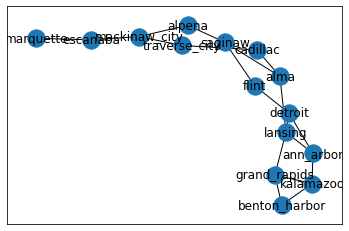

In [2]:
import networkx as nx

g = nx.Graph()
with open("/content/data/data.txt") as file:
  lines = file.readlines()
  for line in lines:
    edges = line.split()
    g.add_edge(edges[0], edges[1], weight=edges[2])

nx.draw_networkx(g)

Networkx populates nx.nodes(g) and nx.edges(g) for us behind the scenes: 

In [3]:
print(f"\nNodes: {nx.nodes(g)}")
print(f"Edges: {nx.edges(g)} + \n\n")


Nodes: ['benton_harbor', 'kalamazoo', 'ann_arbor', 'detroit', 'grand_rapids', 'lansing', 'alma', 'flint', 'saginaw', 'cadillac', 'traverse_city', 'alpena', 'mackinaw_city', 'escanaba', 'marquette']
Edges: [('benton_harbor', 'kalamazoo'), ('benton_harbor', 'grand_rapids'), ('kalamazoo', 'ann_arbor'), ('kalamazoo', 'grand_rapids'), ('ann_arbor', 'detroit'), ('ann_arbor', 'lansing'), ('detroit', 'lansing'), ('detroit', 'flint'), ('grand_rapids', 'lansing'), ('lansing', 'alma'), ('alma', 'saginaw'), ('alma', 'cadillac'), ('flint', 'saginaw'), ('saginaw', 'alpena'), ('cadillac', 'traverse_city'), ('traverse_city', 'mackinaw_city'), ('alpena', 'mackinaw_city'), ('mackinaw_city', 'escanaba'), ('escanaba', 'marquette')] + 




Below is the chronological order of how we would traverse the edges using Breadth First Search.

In [22]:
for i in nx.bfs_edges(g, "ann_arbor", "marquette"): print(f"{i[0]} --> {i[1]}")

ann_arbor --> kalamazoo
ann_arbor --> detroit
ann_arbor --> lansing
kalamazoo --> benton_harbor
kalamazoo --> grand_rapids
detroit --> flint
lansing --> alma
flint --> saginaw
alma --> cadillac
saginaw --> alpena
cadillac --> traverse_city
alpena --> mackinaw_city
mackinaw_city --> escanaba
escanaba --> marquette


Dijkstra's Algorithm is one a way to find the quickest path. It uses the same concept as BFS except instead of a normal queue, it uses a priority queue. We can use either BFS or Dijkstra's to find the quickest path from Ann Arbor to Marquette. This is because BFS and Dijkstra's will both arrive at the same solution. 

In [ ]:
nx.dijkstra_path(g, "ann_arbor", "marquette", "")

['ann_arbor',
 'detroit',
 'flint',
 'saginaw',
 'alpena',
 'mackinaw_city',
 'escanaba',
 'marquette']